In [1]:
format compact
clear variables

In [2]:
sigma = 0.1;
% Doubling time
T = log(2)/sigma

T = 6.9315

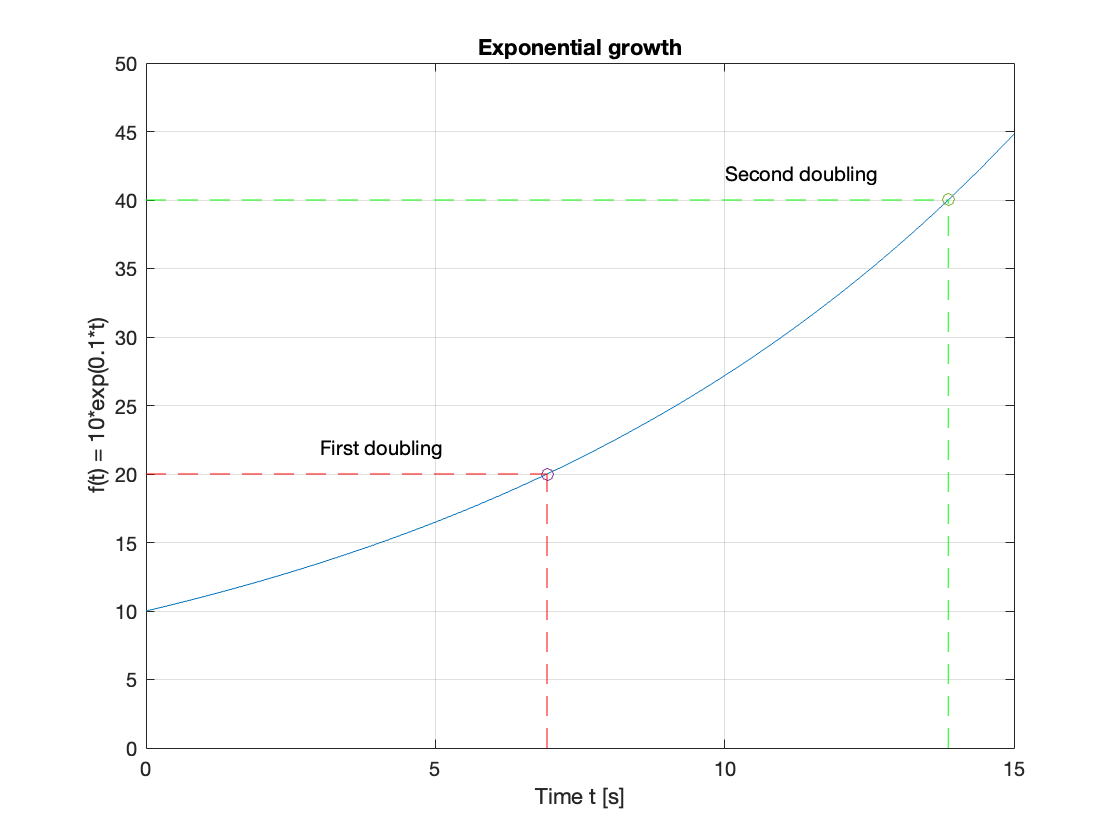

In [3]:
% Plot
t = linspace(0,15,100);
plot(t,10*exp(sigma*t)),ylim([0,50]),grid

% Plot and label lines: first doubling
line([T,T],[0,20],'Color','r','LineStyle','--')
line([0,T],[20,20],'Color','r','LineStyle','--')
hold on
plot(T,20,'o')
text(3,22,'First doubling')
% Plot and label lines: second doubling
plot(2*T,40,'o')
line([2*T,2*T],[0,40],'Color','g','LineStyle','--')
line([0,2*T],[40,40],'Color','g','LineStyle','--')
text(10,42,'Second doubling')
% Label graph
title('Exponential growth'),
ylabel('f(t) = 10*exp(0.1*t)'),xlabel('Time t [s]')
hold off

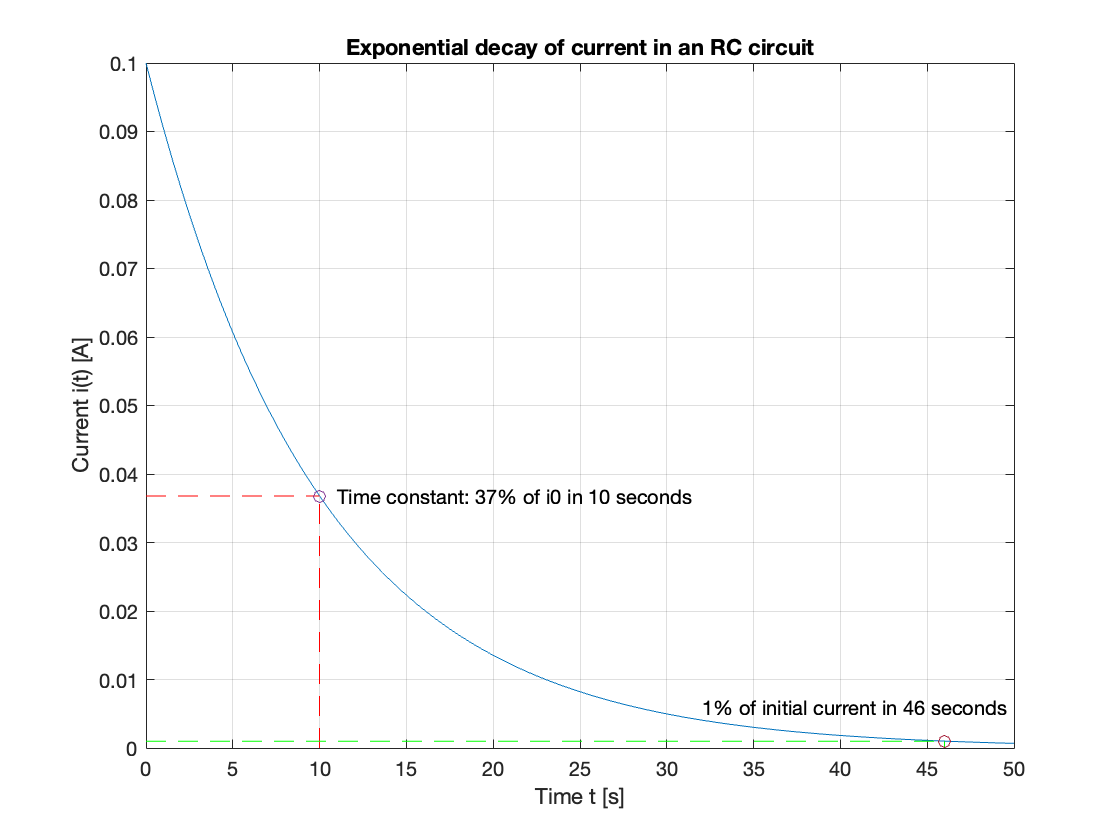

In [4]:
t = linspace(0,50,100);
R = 1e6; C = 10e-6;
sigma = -1/(R*C);
% Time constant and initial current
tau = 1/abs(sigma); i0 = 1/(R*C);
% Plot
plot(t,i0*exp(sigma*t)),grid
% Plot and label lines: time constant
line([tau,tau],[0,i0*exp(-1)],'Color','r','LineStyle','--')
line([0,tau],[i0*exp(-1),i0*exp(-1)],'Color','r','LineStyle','--')
text(tau+1,i0*exp(-1),'Time constant: 37% of i0 in 10 seconds')
hold on
plot(tau,i0*exp(-1),'o')
% Plot and label lines: 1% point
line([4.6*tau,4.6*tau],[0,0.01*i0],'Color','g','LineStyle','--')
line([0,4.6*tau],[0.01*i0,0.01*i0],'Color','g','LineStyle','--')
plot(4.6*tau,0.01*i0,'o')
text(32,0.01*i0+0.005,'1% of initial current in 46 seconds')
% Label graph
title('Exponential decay of current in an RC circuit'),
ylabel('Current i(t) [A]'),xlabel('Time t [s]')
hold off

In [5]:
syms s t zeta omega_n K Y(s) y(t)
assume(t > 0)
Y(s) = K/(s^2 + 2*zeta*omega_n*s + omega_n^2)

In [6]:
y(t) = ilaplace(Y) % The impulse response in the time domain

In [7]:
syms Y_s(s) y_s(t)
zeta = 0.5; omega_n = 10;
X(s) = 1/s;
H(s) = omega_n^2/(s^2 + 2*zeta*omega_n*s + omega_n^2);
Y_s(s) = H(s)*X(s)

In [8]:
% step response
y_s(t) = ilaplace(Y_s(s))

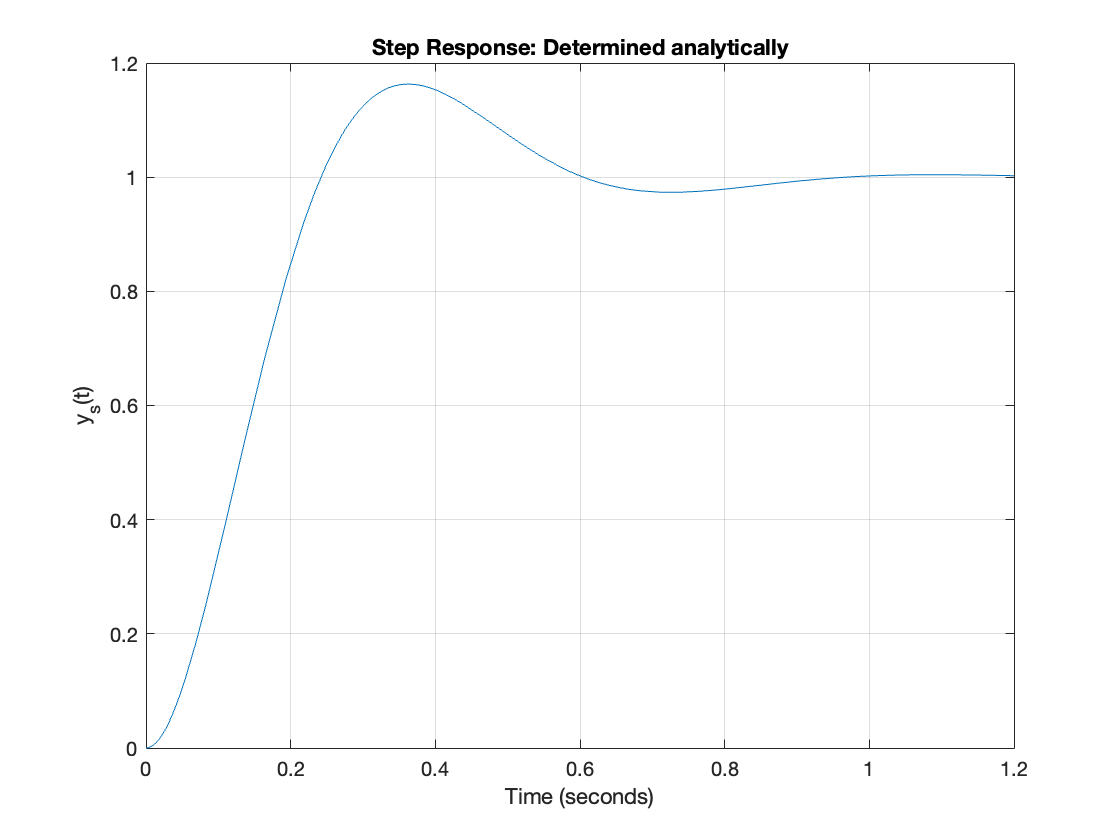

In [9]:
fplot(y_s(t)*heaviside(t),[0,1.2]),ylim([0,1.2]),grid
xlabel('Time (seconds)'),ylabel('y_s(t)'),...
title('Step Response: Determined analytically')

In [10]:
sigma = zeta*omega_n;
omega = omega_n*sqrt(1 - zeta^2);
% Compute response using the formula
t = linspace(0,1.2,100);
yst = (1 - exp(-sigma*t).*(cos(omega*t)+(sigma/omega)*sin(omega*t)));

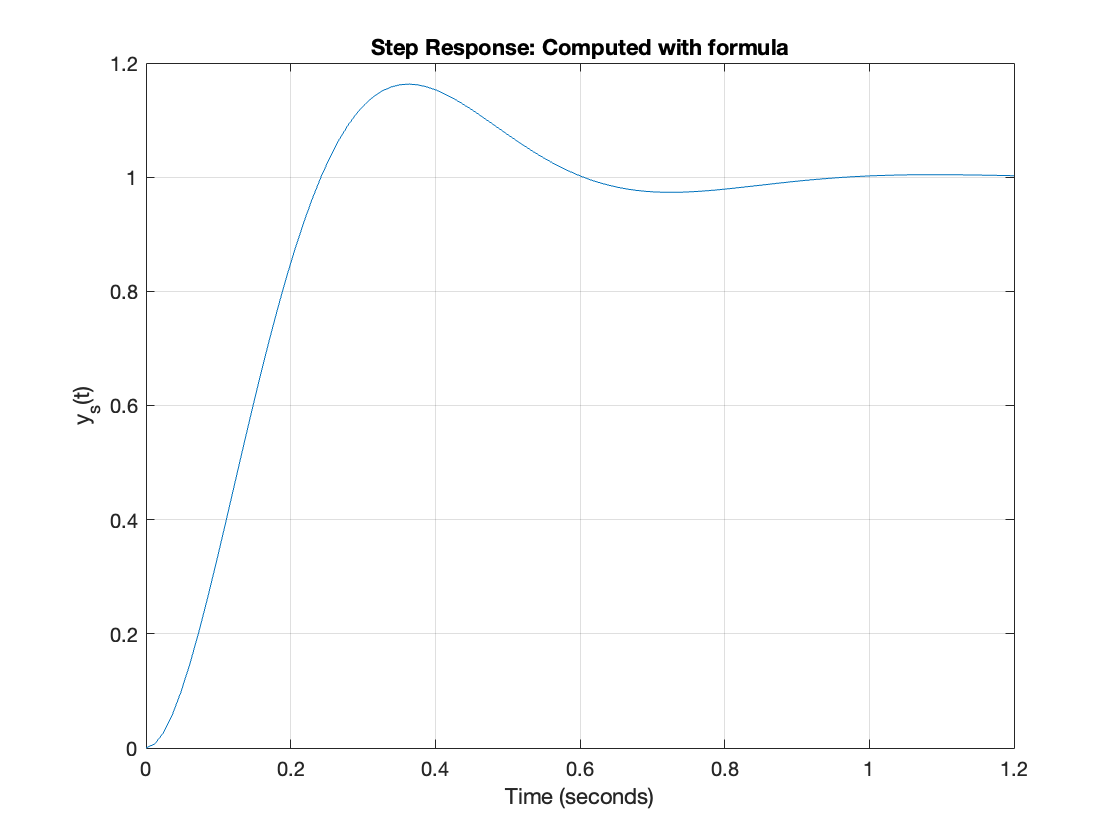

In [11]:
plot(t,yst),grid,...
xlabel('Time (seconds)'),ylabel('y_s(t)'),...
title('Step Response: Computed with formula')

In [12]:
num = omega_n^2; den = [1 2*zeta*omega_n,omega_n^2];
Hs = tf(num,den)

Hs

 =


        100


  ----------------


  s^2 + 10 s + 100


Continuous-time transfer function.

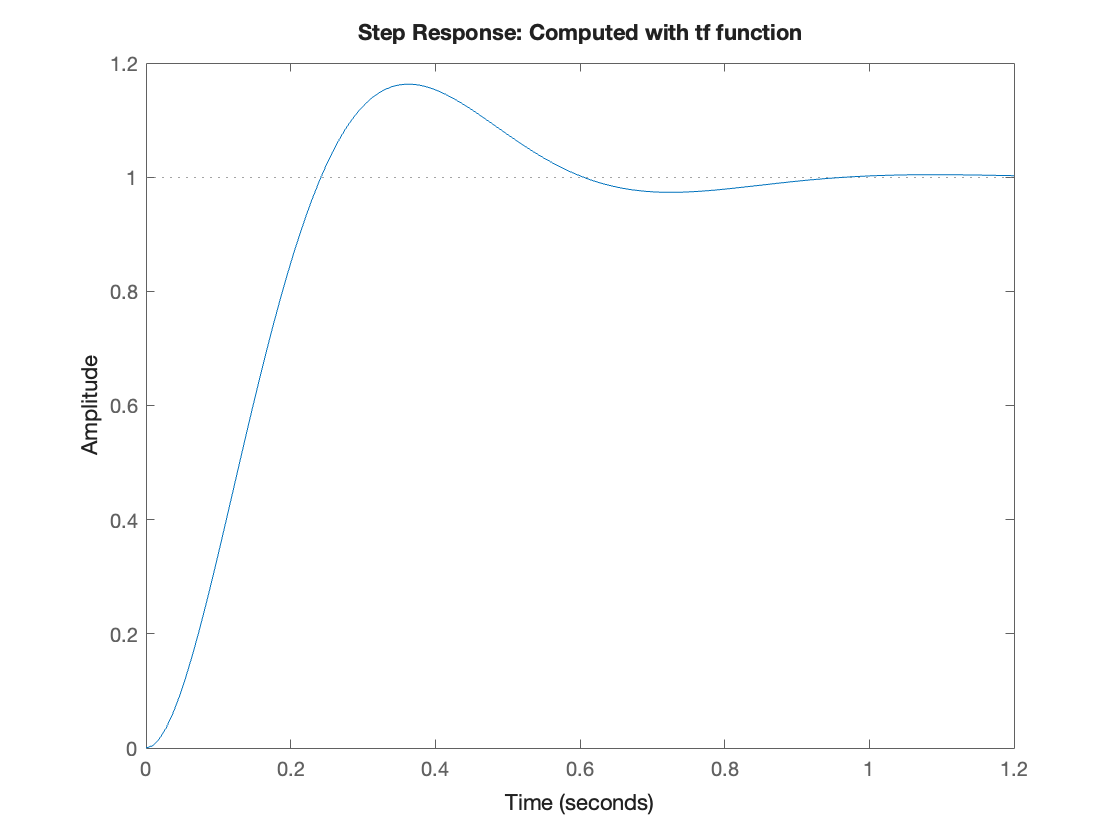

In [13]:
step(Hs),title('Step Response: Computed with tf function')

In [14]:
syms s t
zeta = 0.5; omega_n = 10;
H = omega_n^2/(s^2 + 2*zeta*omega_n*s + omega_n^2)

In [15]:
[num,den] = numden(H);
symbolicPoles = factor(den,'FactorMode','full') % FactorMode needed to reduce quadratic

In [16]:
% Convert symbolic polynomials to numeric polynomials
n = sym2poly(num); d = sym2poly(den);

In [17]:
% Compute the roots
den_poles = roots(d)

den_poles = 
  -5.0000 + 8.6603i
  -5.0000 - 8.6603i

In [18]:
Hs = tf(n,d);

In [19]:
poles = pole(Hs)

poles = 
  -5.0000 + 8.6603i
  -5.0000 - 8.6603i

In [20]:
[wn,z] = damp(Hs)

wn = 2×1 double
   10.0000
   10.0000

z = 2×1 double
    0.5000
    0.5000

In [21]:
[wn,z,p] = damp(Hs)

wn = 2×1 double
   10.0000
   10.0000

z = 2×1 double
    0.5000
    0.5000

p = 
  -5.0000 + 8.6603i
  -5.0000 - 8.6603i

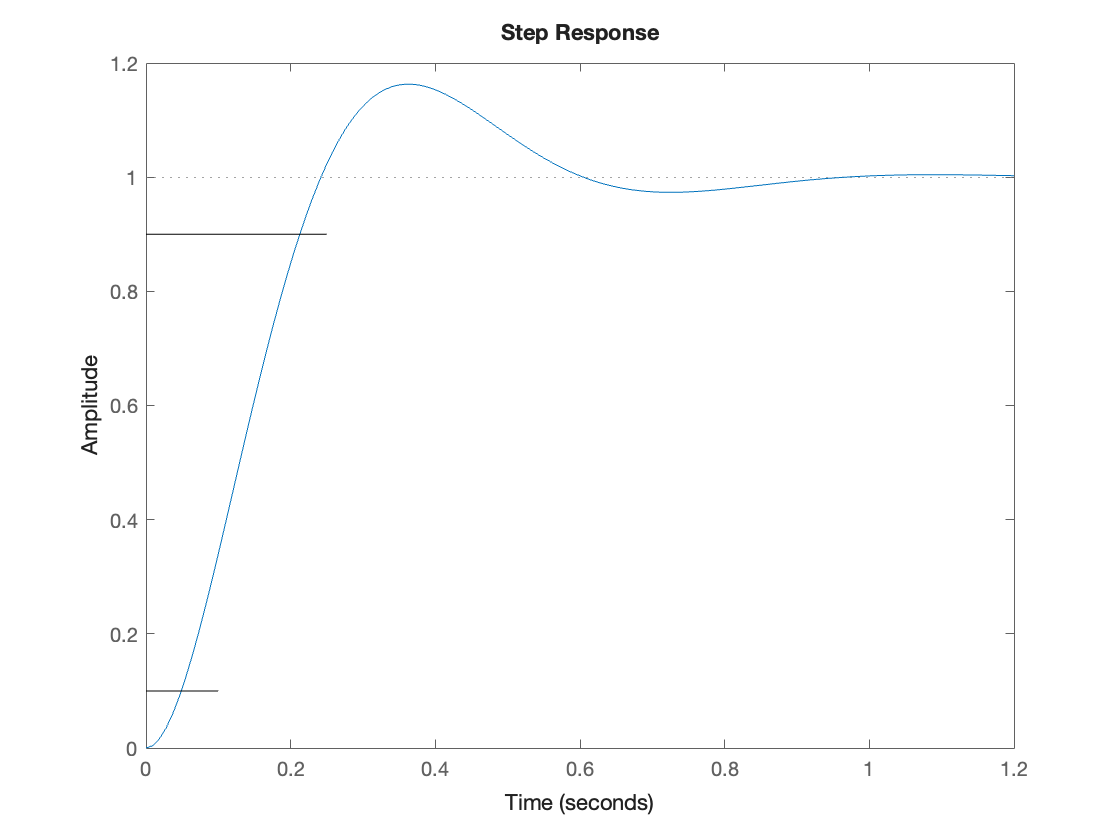

In [22]:
step(Hs),line([0,0.1],[0.1,0.1]),line([0,0.25],[0.9,0.9])

In [23]:
Ts = 4/(zeta*omega_n) % seconds

Ts = 0.8000

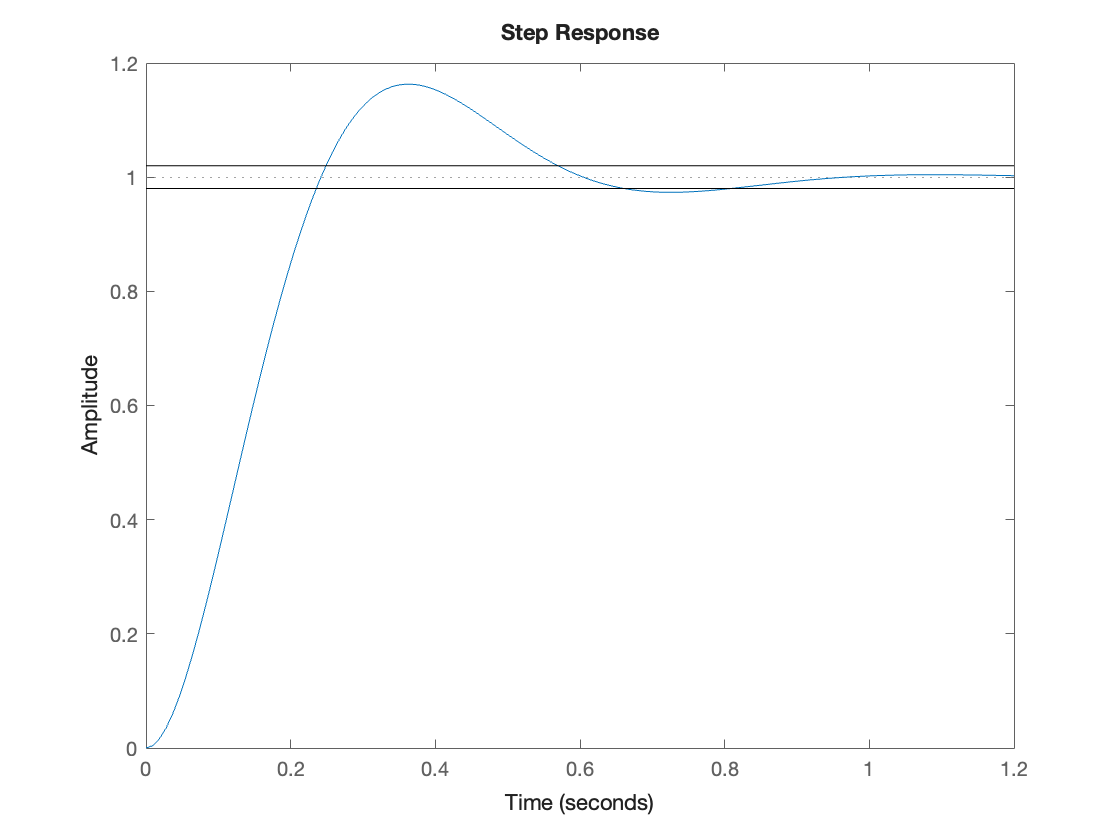

In [24]:
step(Hs),line([0,1.2],[1.02,1.02]),line([0,1.2],[0.98,0.98])

In [25]:
POS = exp(-zeta*pi/sqrt(1 - zeta^2))*100 % OS

POS = 16.3034

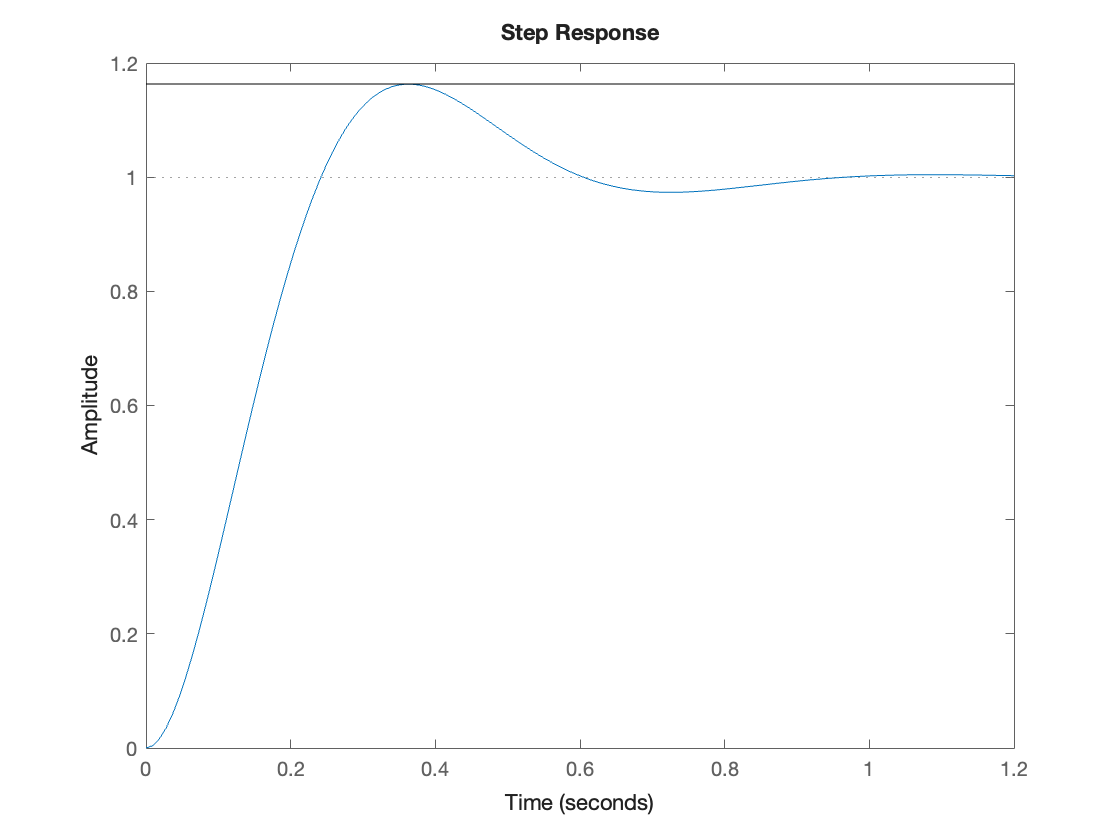

In [26]:
OS = 1 + POS/100; % OS 
step(Hs),line([0,1.2],[OS,OS])

In [27]:
z = -log(POS/100)/sqrt(pi^2 + log(POS/100)^2)

z = 0.5000

In [28]:
Tp = pi/(omega_n*sqrt(1 - zeta^2))

Tp = 0.3628

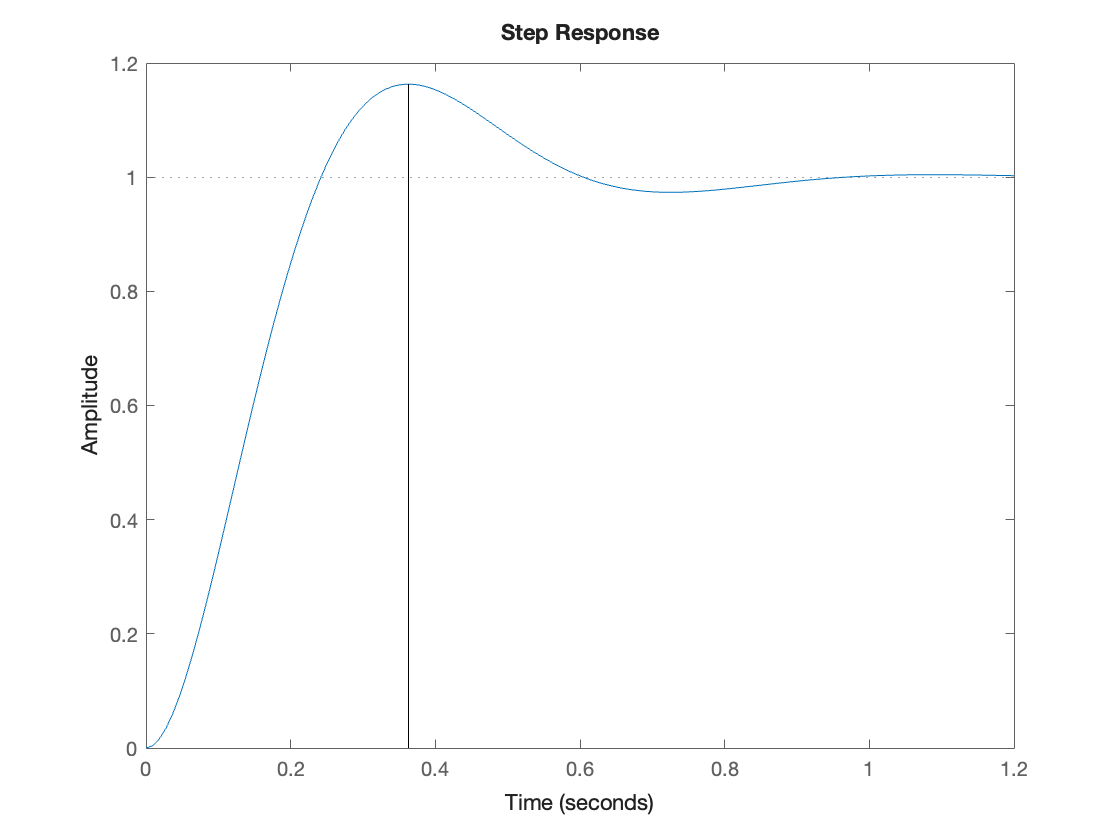

In [29]:
step(Hs),line([Tp,Tp],[0,1.16304])

In [30]:
stepinfo(Hs)

ans = struct with fields:
         RiseTime: 0.1639
    TransientTime: 0.8076
     SettlingTime: 0.8076
      SettlingMin: 0.9315
      SettlingMax: 1.1629
        Overshoot: 16.2929
       Undershoot: 0
             Peak: 1.1629
         PeakTime: 0.3592

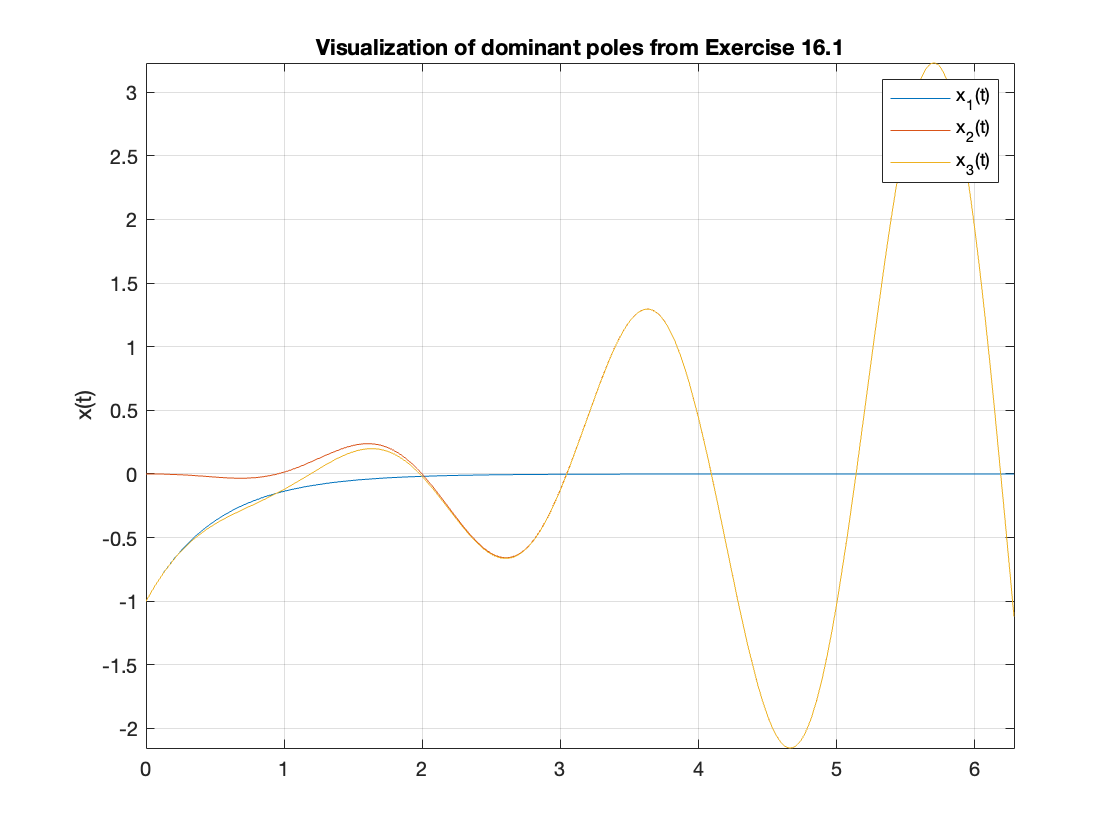

In [31]:
syms t
x_1 = -exp(-2*t)
x_2 = -0.1*t^2*cos(3*t + 5)
x_3 = x_1 + x_2
T = 2*pi/3; % Period of sinusoidal term
fplot(x_1,[0,3*T])
hold on
fplot(x_2,[0,3*T])
fplot(x_3,[0,3*T])
grid, title('Visualization of dominant poles from Exercise 16.1'),ylabel('x(t)')
legend('x_1(t)','x_2(t)','x_3(t)')
hold off

In [32]:
z = [-1.5; -3 - 3j; -3 + 3j];
p = [0; 1 + j; 1 - j; -1; -2 + 2j; -2 - 2j; -3];
% Define a transfer function in zero-pole-gain form
Fs = zpk(z,p,1)

Fs

 =


            (s+1.5) (s^2 + 6s + 18)


  -------------------------------------------


  s (s+1) (s+3) (s^2 - 2s + 2) (s^2 + 4s + 8)


Continuous-time zero/pole/gain model.

In [33]:
tf(Fs)

ans

 =


                s^3 + 7.5 s^2 + 27 s + 27


  -----------------------------------------------------


  s^7 + 6 s^6 + 13 s^5 + 6 s^4 - 10 s^3 + 40 s^2 + 48 s


Continuous-time transfer function.

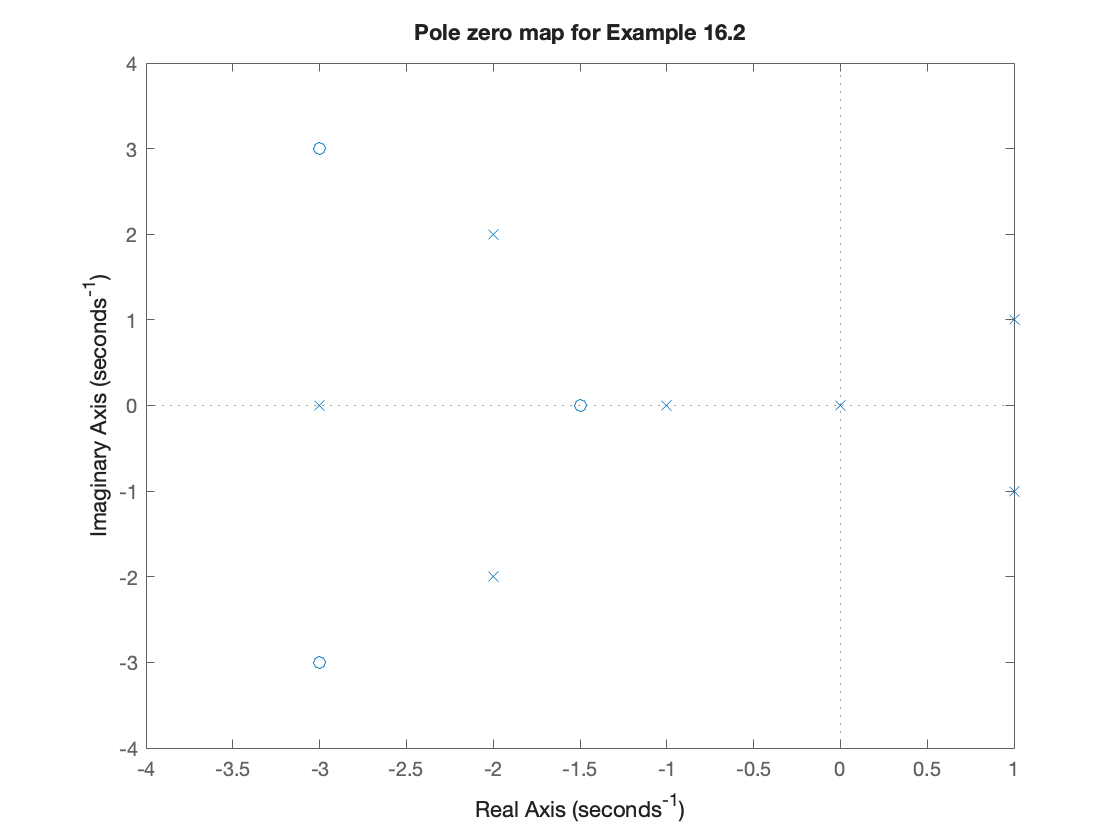

In [34]:
pzmap(Fs),xlim([-4,1]),ylim([-4,4]),title('Pole zero map for Example 16.2')

In [35]:
damp(Fs)

                                                                       
         Pole              Damping       Frequency      Time Constant  
                                       (rad/seconds)      (seconds)    
                                                                       
  0.00e+00                -1.00e+00       0.00e+00              Inf    
 -1.00e+00                 1.00e+00       1.00e+00         1.00e+00    
  1.00e+00 + 1.00e+00i    -7.07e-01       1.41e+00        -1.00e+00    
  1.00e+00 - 1.00e+00i    -7.07e-01       1.41e+00        -1.00e+00    
 -2.00e+00 + 2.00e+00i     7.07e-01       2.83e+00         5.00e-01    
 -2.00e+00 - 2.00e+00i     7.07e-01       2.83e+00         5.00e-01    
 -3.00e+00                 1.00e+00       3.00e+00         3.33e-01    


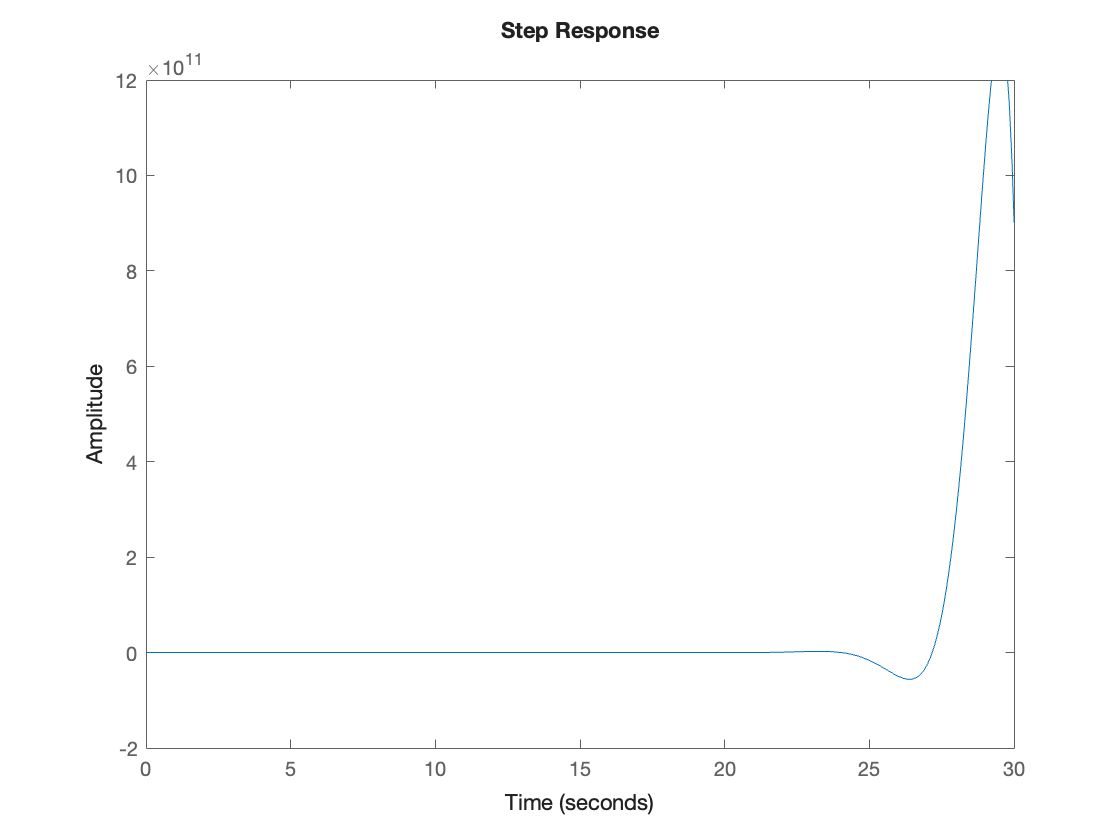

In [36]:
step(Fs)

In [37]:
% Use these symbolic variables
syms m c k
% Replace the NaNs with your expressions
K = 1/m
omega_n = sqrt(k/m)
zeta = (c/m)/(2*omega_n)

In [38]:
% Your solution here
poles = solve(s^2 + (c/m)*s + (k/m) == 0);
pplus = poles(1), pminus = poles(2)

In [39]:
k = 1; m = 1; c = 1;
Gs = tf(1/m, [1 c/m k/m])

Gs

 =


       1


  -----------


  s^2 + s + 1


Continuous-time transfer function.

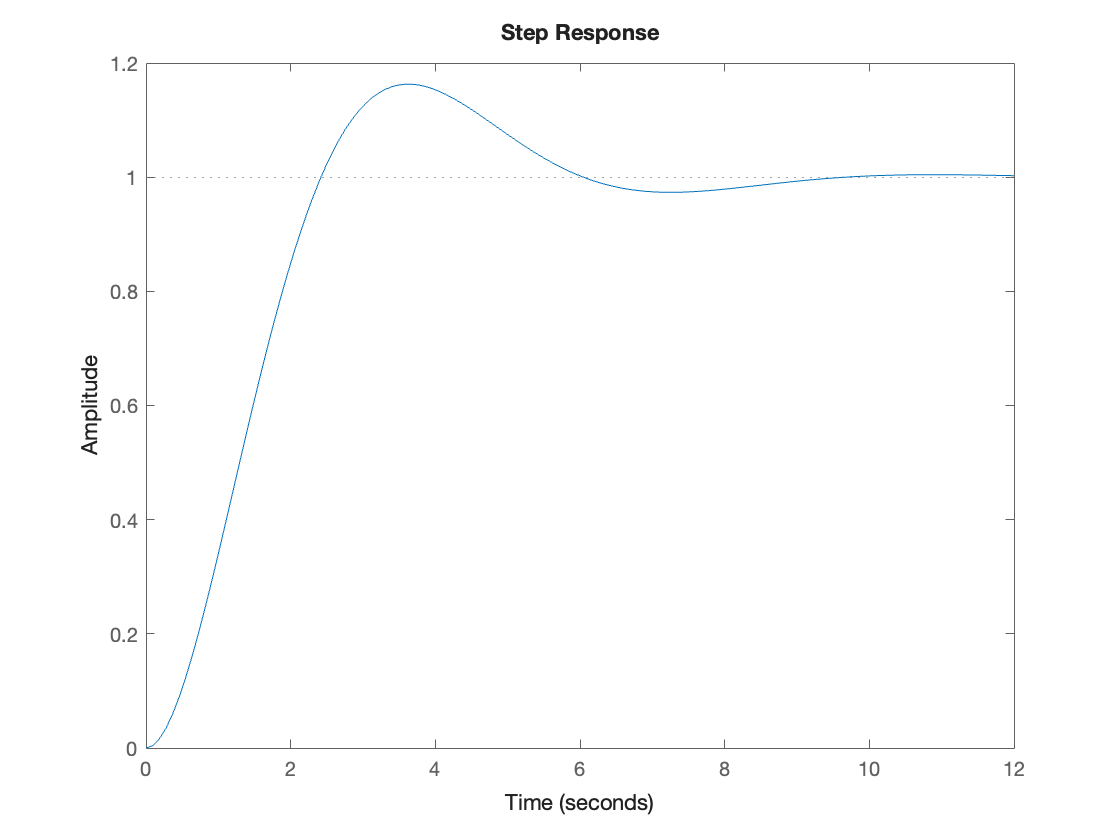

In [40]:
step(Gs)

In [41]:
p = pole(Gs)

p = 
  -0.5000 + 0.8660i
  -0.5000 - 0.8660i

In [42]:
[Wn,Z]=damp(Gs)

Wn = 2×1 double
    1.0000
    1.0000

Z = 2×1 double
    0.5000
    0.5000

In [43]:
stepinfo(Gs)

ans = struct with fields:
         RiseTime: 1.6390
    TransientTime: 8.0759
     SettlingTime: 8.0759
      SettlingMin: 0.9315
      SettlingMax: 1.1629
        Overshoot: 16.2929
       Undershoot: 0
             Peak: 1.1629
         PeakTime: 3.5920